## 安徽观测排放源数据处理分析
## `Observation data in Anhui`

---
*@author: Evan*\
*@date: 2023-03-07*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os

In [2]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'], # simsun字体中文版就是宋体
}
rcParams.update(config)

In [7]:
filename='D:/files/Master/02学术/横向项目_安庆_杭州/data_lzj/2019-安庆市-清单数据_汇总表.xlsx'
xls = pd.ExcelFile(filename)

# 指定要提取的工作表名称
sheet_names = ['电力供热', '工业锅炉', '民用锅炉']

# 创建一个空的DataFrame来存储提取的数据
result_df = pd.DataFrame()

# 指定要挑选的列名中包含的关键字
column_keyword = '排放量'
other_columns = ['经度', '纬度']

# 遍历每个工作表
for sheet_name in sheet_names:
    # 读取该工作表中的数据
    df = pd.read_excel(xls, sheet_name)
    
    # 挑选出列名中包含指定关键字的列
    selected_columns = df.columns[df.columns.str.contains(column_keyword)]
    
    # 合并包含指定关键字的列和其他列名
    required_columns = pd.Index(other_columns).union(selected_columns)
    
    # 按照所需列名选取数据
    selected_df = df[required_columns]
    
    # 将选定的数据添加到结果DataFrame中
    result_df = pd.concat([result_df, selected_df], ignore_index=True)

result_df.to_excel('D:/Download/化石燃料_除民用.xls',index=False)
result_df

,BC排放量,CO2排放量,CO排放量,NH3排放量,NOx排放量,OC排放量,PM10排放量,PM2.5排放量,SO2排放量,TSP排放量,VOC排放量,纬度,经度
0,0.1125,5.172514e+05,573.7350,0.0000,91.0269,0.0000,70.2402,56.2607,206.7741,72.1324,11.4747,30.5317,117.0367
1,2.8410,9.454710e+04,520.4274,20.0808,116.7197,11.8011,21.8430,20.7612,11.7138,21.8448,94.5471,31.0089,116.9444
2,0.0233,8.905235e+05,987.7683,0.0000,210.7561,0.0000,21.1095,11.6286,58.4637,27.4183,19.7554,30.6667,117.1667
3,0.0233,8.905235e+05,987.7683,0.0000,210.7561,0.0000,21.1095,11.6286,58.4637,27.4183,19.7554,30.6667,117.1667
4,0.1038,3.976063e+06,4410.2467,0.0000,940.9962,0.0000,94.2510,51.9202,261.0320,122.4187,88.2049,30.6667,117.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0000,1.879314e+03,1.1297,0.0000,3.5594,0.0000,0.0261,0.0261,0.0000,0.0261,0.0174,30.8494,116.3670
197,0.0000,8.650470e+01,0.0520,0.0000,0.1638,0.0000,0.0012,0.0012,0.0000,0.0012,0.0008,30.1625,116.1206
198,0.0251,5.788644e+02,0.1116,0.0000,1.3764,0.0074,0.0930,0.0930,0.5580,0.0930,0.0242,31.0583,116.9425
199,0.0000,2.811402e+02,0.1690,0.0000,0.5325,0.0000,0.0039,0.0039,0.0000,0.0039,0.0026,30.4501,116.2987


In [12]:
filename='D:/files/Master/02学术/横向项目_安庆_杭州/data_lzj/2019-安庆市-清单数据_汇总表.xlsx'
xls = pd.ExcelFile(filename)

# 指定要提取的工作表名称
sheet_names = ['冶金', '建材', '石化与化工', '化纤', '医药制造', '其他工业']

# 创建一个空的DataFrame来存储提取的数据
result_df = pd.DataFrame()

# 指定要挑选的列名中包含的关键字
column_keyword = '排放量'
other_columns = ['经度', '纬度']

# 遍历每个工作表
for sheet_name in sheet_names:
    # 读取该工作表中的数据
    df = pd.read_excel(xls, sheet_name)
    
    # 挑选出列名中包含指定关键字的列
    selected_columns = df.columns[df.columns.str.contains(column_keyword)]
    
    # 合并包含指定关键字的列和其他列名
    required_columns = pd.Index(other_columns).union(selected_columns)
    
    # 按照所需列名选取数据
    selected_df = df[required_columns]
    
    # 将选定的数据添加到结果DataFrame中
    result_df = pd.concat([result_df, selected_df], ignore_index=True)

result_df.to_excel('D:/Download/工艺过程.xls',index=False)

In [55]:
df = pd.read_excel('D:/files/Master/02学术/横向项目_安庆_杭州/data/obs_emission/2019-安庆市汇总表.xlsx',index_col=0)
df = df.iloc[:-1, :]  # 去掉最后一行
df

,SO2,NOX,CO,VOC,NH3,TSP,PM10,PM2.5,BC,OC,CO2
一级源分类,,,,,,,,,,,
化石燃料固定燃烧源,2326,4616,20562,2561,107,2838,1412,833,62,118,22049323
工艺过程源,2528,7483,46030,13015,121,74974,27750,13514,139,178,8282775
移动源,569,20552,15094,2725,267,1373,1314,1241,786,258,3260381
溶剂使用源,0,0,0,18774,0,0,0,0,0,0,0
农业源,0,0,0,0,24649,0,0,0,0,0,0
扬尘源,0,0,0,0,0,123309,30505,5442,0,0,0
储存运输源,0,0,0,461,0,0,0,0,0,0,0
生物质燃烧源,291,614,21213,2221,256,2124,2024,1882,415,1136,536650
废弃物处理源,0,0,0,45,1537,0,0,0,0,0,0


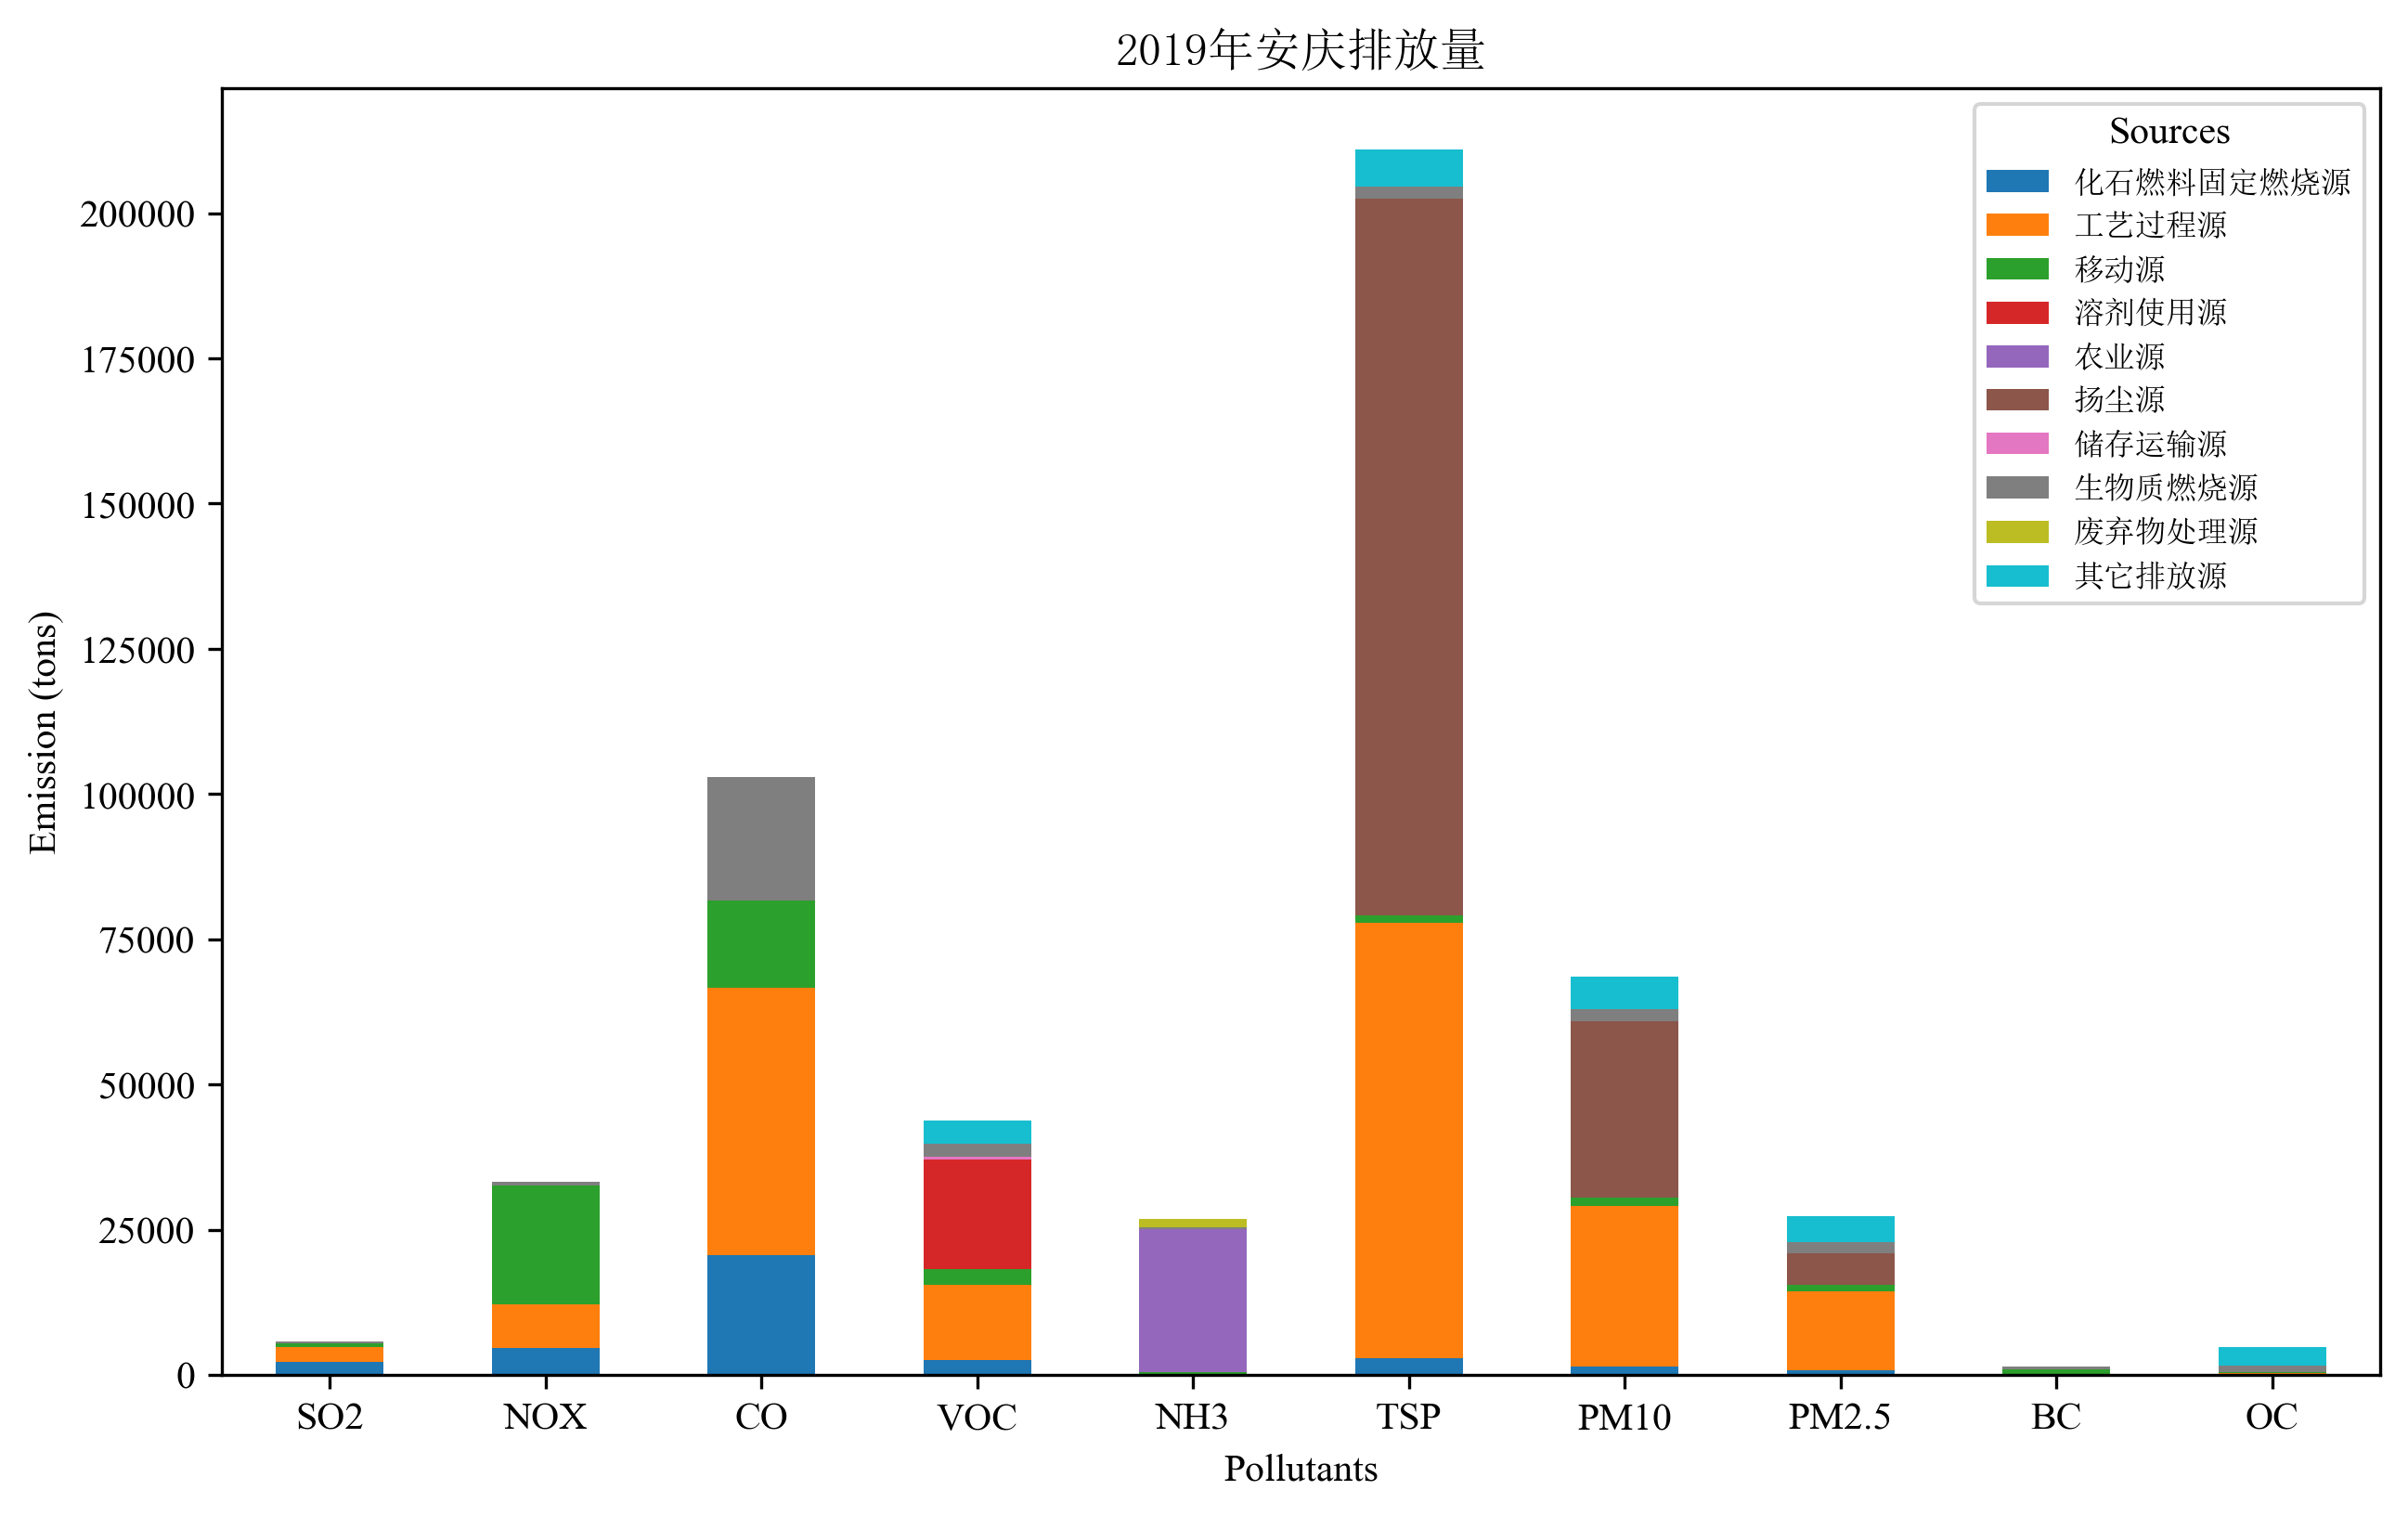

In [84]:
# 绘制堆积柱状图
fig=plt.figure(figsize=(10,6),dpi=300)
ax=fig.subplots(1,1)
bar=df.iloc[:,:-1].T.plot(kind='bar', stacked=True, ax=ax)

# 设置图形属性
plt.title('2019年安庆排放量',fontdict={'family':'SimSun','size':12})
plt.xlabel('Pollutants')
plt.ylabel('Emission (tons)')
ax.legend(title='Sources',prop={'family':'SimSun','size':8})
bar.set_xticklabels(df.iloc[:,:-1].columns, rotation=0)

# 显示图形
plt.show()


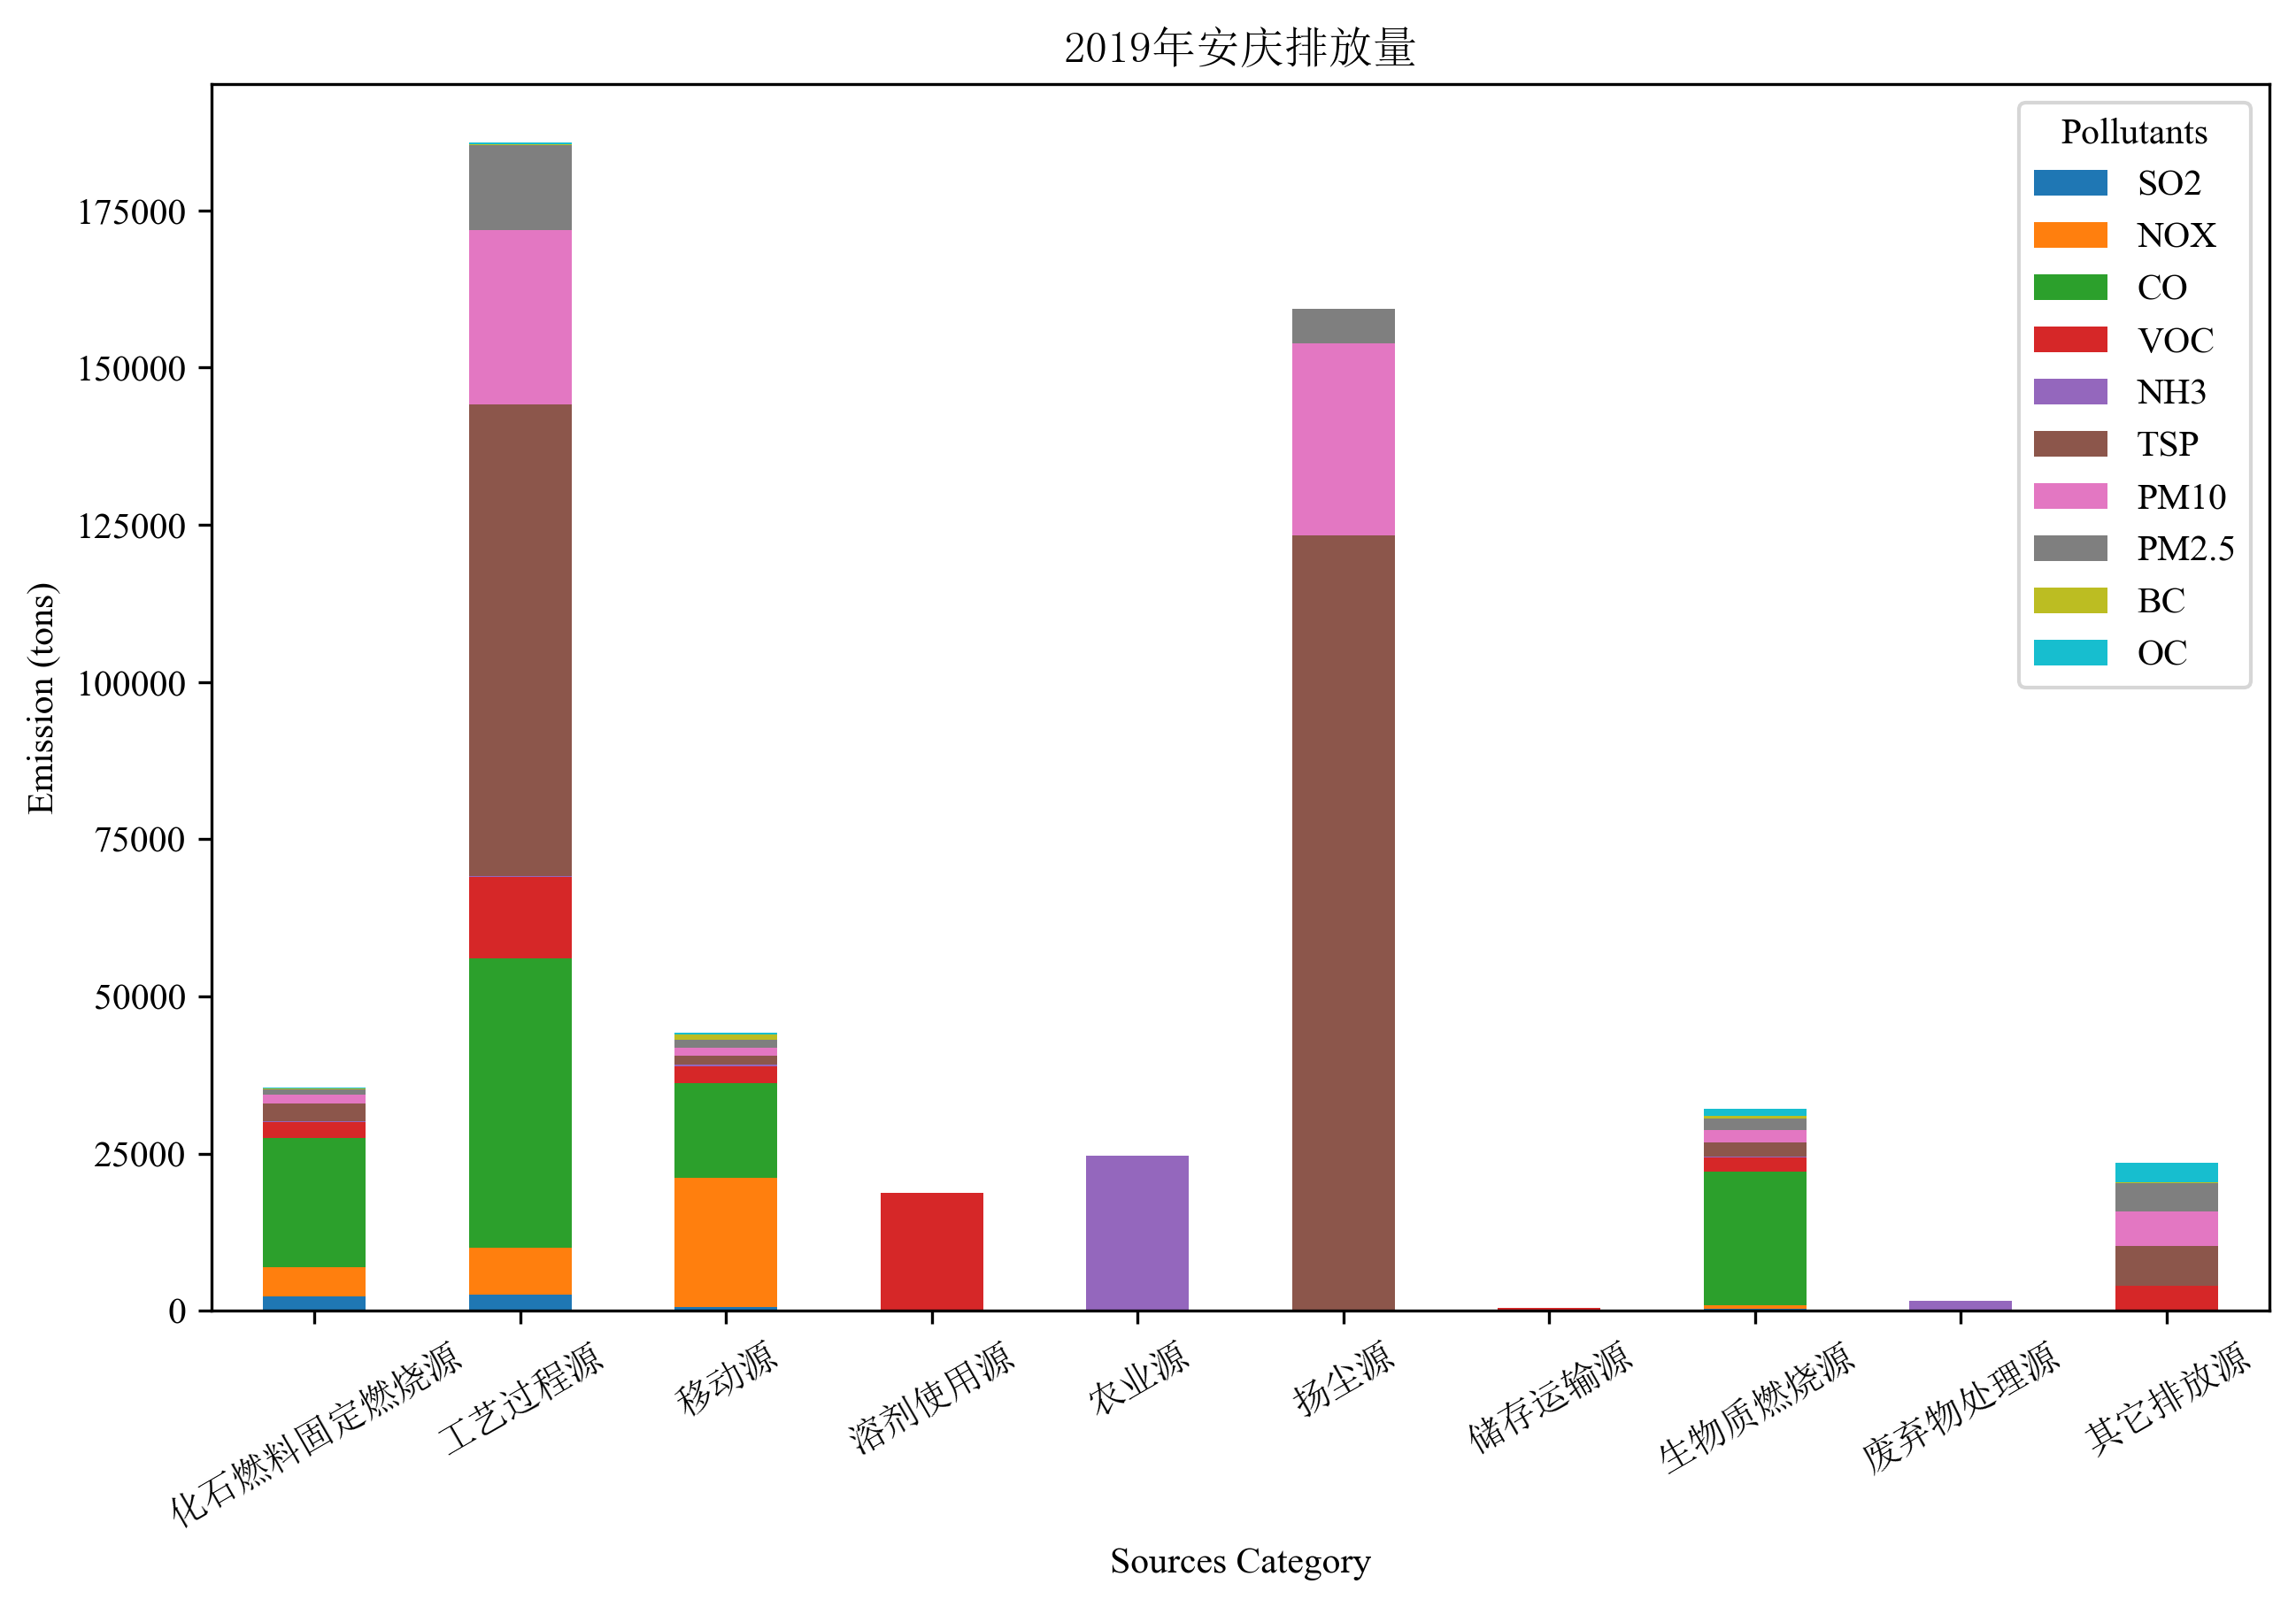

In [91]:
# 绘制堆积柱状图
fig=plt.figure(figsize=(10,6),dpi=300)
ax=fig.subplots(1,1)
bar=df.iloc[:,:-1].plot(kind='bar', stacked=True, ax=ax)

# 设置图形属性
plt.title('2019年安庆排放量',fontdict={'family':'SimSun','size':12})
plt.xlabel('Sources Category')
plt.ylabel('Emission (tons)')
ax.legend(title='Pollutants')
bar.set_xticklabels(df.index, rotation=30,fontdict={'family':'SimSun'},ha='center')

# 显示图形
plt.show()
